**Exploratory Data Analysis (EDA)**

This notebook demonstrates how EDA was done for model training

The first step is to import the libraries for EDA

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next take the data and transform it into a Pandas DataFrame

In [122]:
data = r"C:\Users\leona\Desktop\projetos_github\machine_learning_projects\machine-learning-projects\simple property price forecast\dataset\USA Housing Dataset.csv"
df = pd.read_csv(data)
df.rename(columns={"sqft_living": "area living","sqft_lot": "area lot","view": "view quality","sqft_above": "area above","sqft_basement": "area basement"}, inplace=True)

In [123]:
display(df)

,date,price,bedrooms,bathrooms,area living,area lot,floors,waterfront,view quality,condition,area above,area basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [124]:
df.shape

(4140, 18)

In [125]:
df = df.query("price > 0")
df.shape

(4091, 18)

In [126]:
df["prices_view"] = df["price"]/1000

Adjusting this feature may be useful in the future.

In [127]:
df['yr_renovated'] = np.where(df['yr_renovated'] == 0, df['yr_built'], df['yr_renovated'])

Drop unnecessary columns

In [128]:
df.drop(columns=["statezip", "country"], axis=0, inplace=True)

For best results, creating new features can be helpful.

In [129]:
df["date"] = pd.to_datetime(df["date"])

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["time since construction"] = df["year"] - df["yr_built"]
df["time since reform"] = df["year"] - df["yr_renovated"]
df.drop(["yr_built", "yr_renovated"], axis=1, inplace=True)

df[["year", "month", "day", "time since construction", "time since reform"]]

,year,month,day,time since construction,time since reform
0,2014,5,9,6,6
1,2014,5,9,7,7
2,2014,5,9,4,4
3,2014,5,9,7,7
4,2014,5,10,35,35
...,...,...,...,...,...
4135,2014,7,9,60,35
4136,2014,7,9,31,5
4137,2014,7,9,5,5
4138,2014,7,10,40,40


Now an important step is to analyze the data to understand ownership over it.

In [130]:
df.dtypes

date                       datetime64[ns]
price                             float64
bedrooms                          float64
bathrooms                         float64
area living                         int64
area lot                            int64
floors                            float64
waterfront                          int64
view quality                        int64
condition                           int64
area above                          int64
area basement                       int64
street                             object
city                               object
prices_view                       float64
year                                int32
month                               int32
day                                 int32
time since construction             int64
time since reform                   int64
dtype: object

In this data we have two columns of objects, the next step is to analyze them

This category is unnecessary, as there are many categories, it is almost 1:1 in relation to the data.

In [131]:
df["street"].value_counts().count()

4030

In [132]:
df.drop("street", axis=1, inplace=True)

This column can be very useful, to transform this feature into numerical data, one option is one-hot encoding, but in this case I will use target encoding when separating the data into training, testing and validation

43

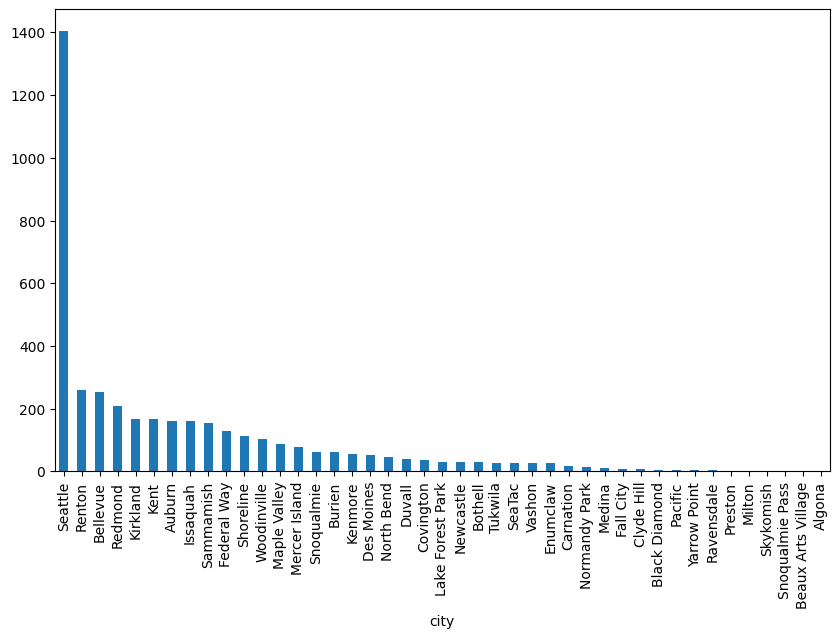

In [133]:
df["city"].value_counts().plot(kind="bar", figsize=(10, 6))
df["city"].value_counts().count()

Create a feature to represent a class for each price, using ranges

In [134]:
num_bins = 500
bins = np.linspace(df["price"].min(), df["price"].max(), num_bins+1)
df["price_binned"] = pd.cut(df["price"], bins=bins, labels=range(1, num_bins+1), include_lowest=True)

This can show the sazonality of data

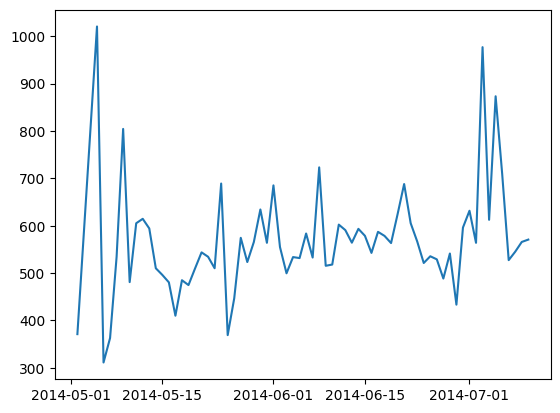

In [135]:
avg_price_data = df.groupby(["date"])["prices_view"].mean()
plt.plot(avg_price_data.index, avg_price_data.values)

In [136]:
df.drop("date", axis=1, inplace=True)

In [137]:
city_counts = df["city"].value_counts()

df = df[~df["city"].isin(city_counts[city_counts < 50].index)]
df["city"].value_counts().count()

18

Next step is identify outliars

<Axes: ylabel='prices_view'>

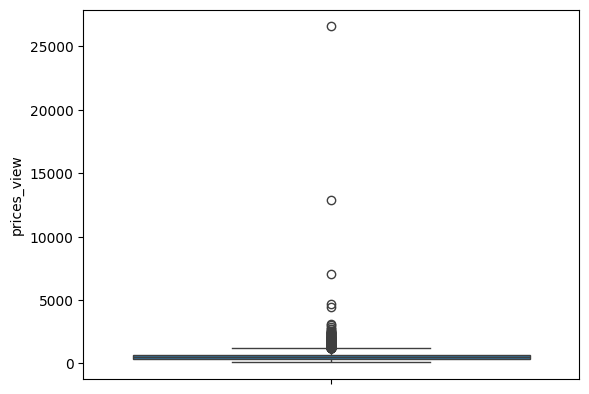

In [138]:
sns.boxplot(df["prices_view"])

In [139]:
df.describe().T.style.background_gradient(cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
price,3676.000000,566043.390189,597052.634221,87500.000000,330000.000000,475000.000000,670625.000000,26590000.000000
bedrooms,3676.000000,3.395811,0.906979,0.000000,3.000000,3.000000,4.000000,8.000000
bathrooms,3676.000000,2.160297,0.778820,0.000000,1.750000,2.250000,2.500000,6.750000
area living,3676.000000,2131.588411,946.722479,370.000000,1460.000000,1970.000000,2610.000000,10040.000000
area lot,3676.000000,12516.477693,28972.048004,638.000000,4876.250000,7350.000000,10281.000000,1074218.000000
floors,3676.000000,1.522035,0.540903,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,3676.000000,0.005441,0.073570,0.000000,0.000000,0.000000,0.000000,1.000000
view quality,3676.000000,0.238030,0.774899,0.000000,0.000000,0.000000,0.000000,4.000000
condition,3676.000000,3.455930,0.677302,1.000000,3.000000,3.000000,4.000000,5.000000
area above,3676.000000,1813.518226,846.825122,370.000000,1180.000000,1590.000000,2292.500000,7680.000000


<Axes: >

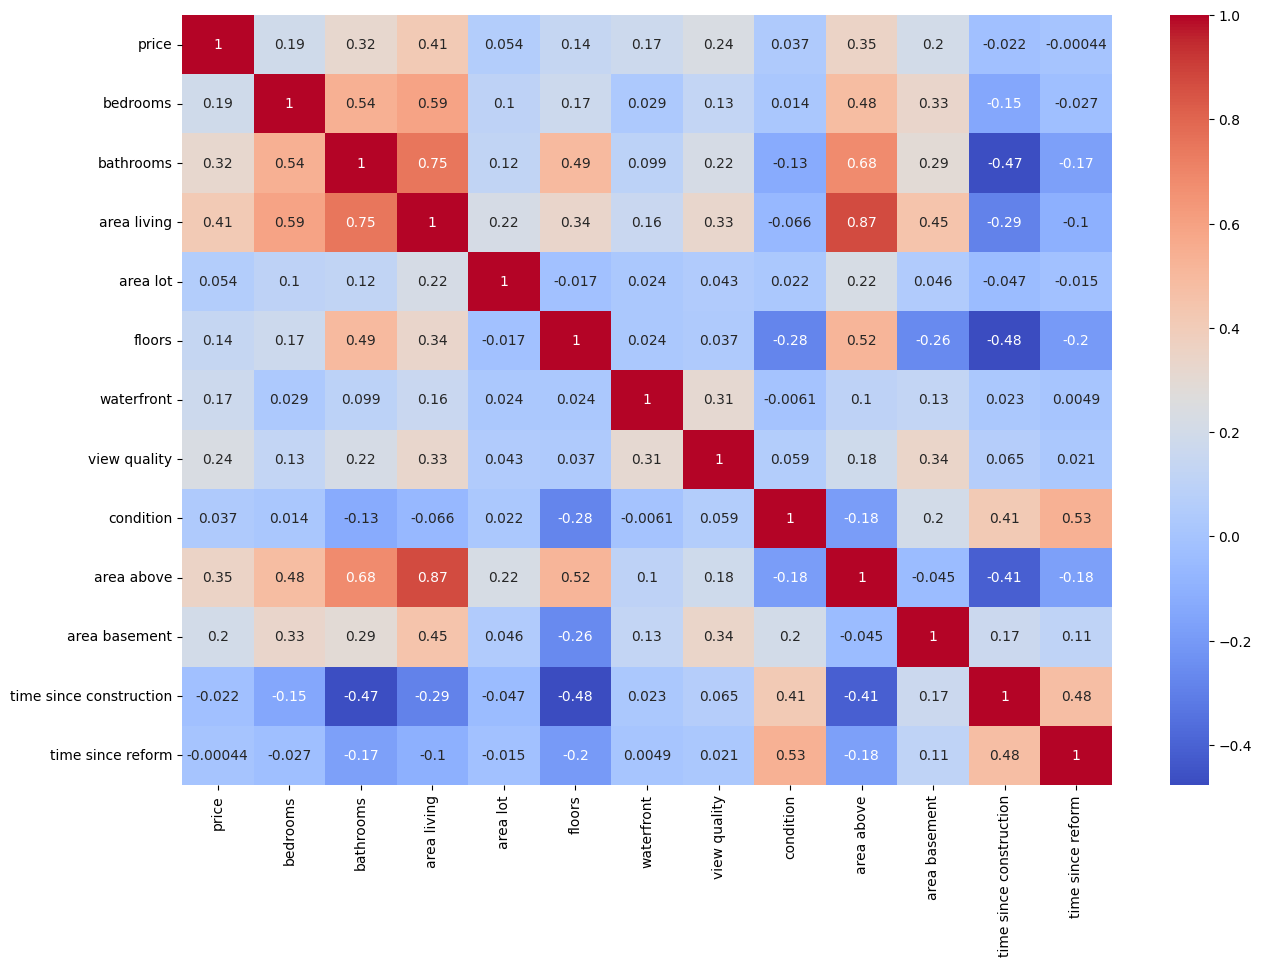

In [140]:
df_corr = df.drop(columns=["city", "prices_view", "year", "month", "day", "price_binned"], axis=1)
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')

The next step is to identify and treat missing values ​​if any.

In [141]:
missing_values = df.isna().sum()/len(df)*100
display(missing_values)

price                      0.0
bedrooms                   0.0
bathrooms                  0.0
area living                0.0
area lot                   0.0
floors                     0.0
waterfront                 0.0
view quality               0.0
condition                  0.0
area above                 0.0
area basement              0.0
city                       0.0
prices_view                0.0
year                       0.0
month                      0.0
day                        0.0
time since construction    0.0
time since reform          0.0
price_binned               0.0
dtype: float64

The next step is to transform categorical columns into numeric columns

In [142]:
df = pd.get_dummies(df, columns = ["city"], drop_first=False, dtype=int)

In [143]:
df.drop("price_binned", axis=1, inplace=True)

Now finally the data is divided into training and testing and normalize data

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Definir colunas a serem normalizadas
columns_to_normalize = ["bedrooms", "bathrooms", "area living", "area lot", "floors", 
                        "waterfront", "view quality", "condition", "area above", 
                        "area basement", "prices_view", "year", "month", "day", 
                        "time since construction", "time since reform"]

# Dividir o dataset em treino e teste
df_train, df_test = train_test_split(df, test_size=0.2, random_state=10, shuffle=True)

# Normalizar as colunas selecionadas
scaler = MinMaxScaler(feature_range=(0, 1))
df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])
df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])

# Caminho dos arquivos CSV
train_path = r'C:\Users\leona\Desktop\projetos_github\machine_learning_projects\machine-learning-projects\simple property price forecast\processed_data\train.csv'
test_path = r'C:\Users\leona\Desktop\projetos_github\machine_learning_projects\machine-learning-projects\simple property price forecast\processed_data\test.csv'

# Salvar os conjuntos de treino e teste
df_train.to_csv(train_path, index=False)
df_test.to_csv(test_path, index=False)
